    Exercise Sheet Week 8    

In [2]:
import numpy as np
from scipy.stats import norm, gamma
from IPython import display

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
np.random.seed(13)

# Task 1: Factorized Approximation

## 1.a

In [4]:
mu, tau = 0, 1
n_1 = 20
N_1 = np.random.normal(mu,tau**-1,n_1)

## 1.b

In [14]:
#helper function for q_mu
def q_mu(mu, mu_n, lambda_n):
    return norm.pdf(mu, loc= mu_n, scale = lambda_n **-1)

#helper function for q_tau
def q_tau(tau, a_n, b_n):
    return gamma.pdf(tau,a = a_n, scale = b_n)

## 1.c

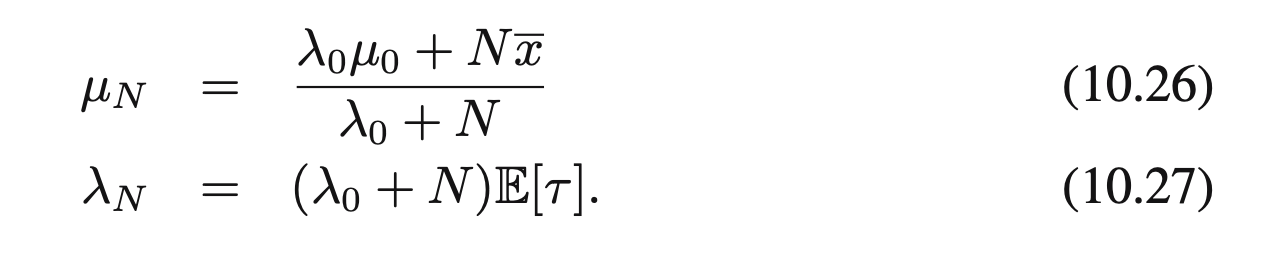

In [6]:
display.Image('/Users/emilykruger/Downloads/Screenshot 2023-10-24 at 17.00.40.png')

from exercise session: N = iteration number --> if N goes towards infinity, the lambda terms become irrelevant, the N cancel out and we go towards mean of x

$ \mu_N = \frac{\lambda_0*\mu_0 + N \overline{x}}{\lambda_0 + N}$

$ \lambda_N = (\lambda_0 + N) \mathbb{E}[\tau]$

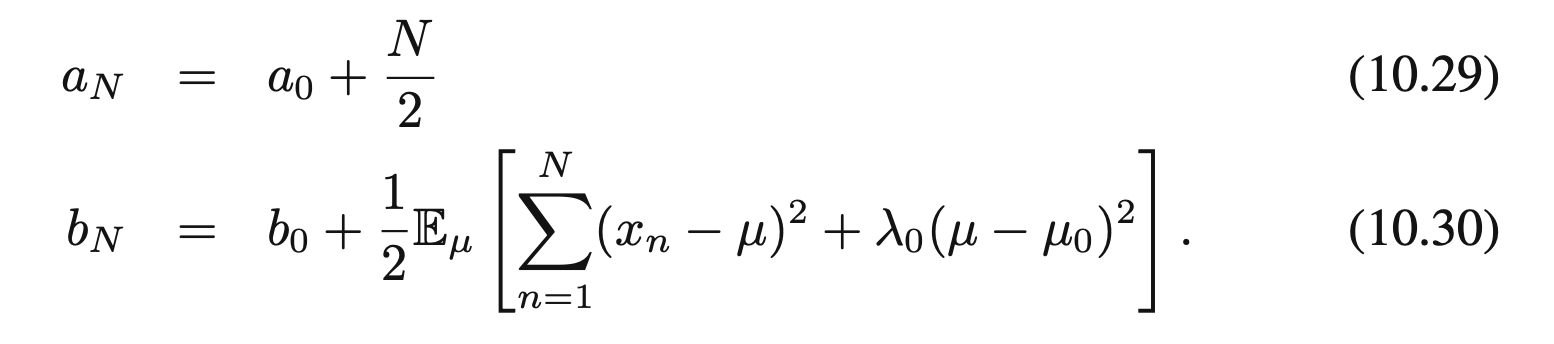

In [7]:
display.Image('/Users/emilykruger/Downloads/Screenshot 2023-10-24 at 17.00.51.png')

$ a_N = a_0 + \frac{N}{2}$

$b_0 = \frac{1}{2} \mathbb{E_{\mu}} (\sum_{n=1}^{N} (x_N - \mu)^2 + \lambda_0*(\mu - \mu_0)^2) $

$ \mathbb{E}[\tau] = \frac{a_N}{b_N} $ (bishop p 472)

$ \mathbb{E}[\mu] = \overline{x}$  bishop p 473 --> yes, but 

$\mathbb{E}[\mu] =/= \mathbb{E_{\mu}}[...]$ 

In [17]:
# initialize initial mu and tau approx based on given values
prev_mu = 0
prev_lambda = 1.2
prev_a = 1
prev_b = 1
num_iters = 0
max_iters = 50
n = 20

#update values according to Bishop
while num_iters < max_iters:
     # update a_n and b_n and
    new_a = prev_a + (n_1/2)
    new_b = prev_b + 0.5 * np.mean(N_1) * np.sum(np.square(N_1 - prev_mu) + prev_lambda*np.square(prev_mu-new_mu))
    #update mu and lamda_n and
    new_mu = (prev_lambda*prev_mu + n_1 * np.mean(N_1))/(prev_lambda + n_1)
    new_lambda = (prev_lambda+n_1) *  (new_a / new_b)
    #update q(mu,tau)
    q = q_mu(mu, new_mu, new_lambda) + q_tau(tau, new_a, new_b)
    #make current values prev_values
    prev_mu = new_mu
    prev_lambda = new_lambda
    prev_a = new_a
    prev_b = new_b
    #update number of iterations
    num_iters += 1

In [20]:
q_mu(mu, new_mu, new_lambda)

-3.5572668169385807e+55

In [21]:
q_tau(tau, new_a, new_b)

-5087.441099201426

In [19]:
q

0.0

## 1.f

In [ ]:
#plot

## 1.d

**max_iter = 10**

In [ ]:
# initialize initial mu and tau approx based on given values
prev_mu = 0
prev_lambda = 1.2
prev_a = 1
prev_b = 1
num_iters = 0
max_iters = 10
n = 20

#update values according to Bishop
while num_iters < max_iters:
    #update mu and lamda_n and
    new_mu = (prev_lambda*prev_mu + n * np.mean(N_1))/(prev_lambda + n)
    new_lambda = (prev_lambda+n) * #fill in here
    # update a_n and b_n and
    new_a = prev_a + (n/2)
    new_b = prev_b + 0.5 #fill in here
    #update q(mu,tau)
    q = q_mu(mu, new_mu, new_lambda) * q_tau(tau, new_a, new_b)
    #make current values prev_values
    prev_mu = new_mu
    prev_lamda = new_lambda
    prev_a = new_a
    prev_b = new_b
    #update number of iterations
    num_iters += 1

In [ ]:
#plot

**max_iter = 500**

In [ ]:
max_iter = 500

#update values according to Bishop
while num_iters < max_iters:
    #update mu and lamda_n and
    new_mu = (prev_lambda*prev_mu + n * np.mean(N_1))/(prev_lambda + n)
    new_lambda = (prev_lambda+n) * #fill in here
    # update a_n and b_n and
    new_a = prev_a + (n/2)
    new_b = prev_b + 0.5 #fill in here
    #update q(mu,tau)
    q = q_mu(mu, new_mu, new_lambda) * q_tau(tau, new_a, new_b)
    #make current values prev_values
    prev_mu = new_mu
    prev_lamda = new_lambda
    prev_a = new_a
    prev_b = new_b
    #update number of iterations
    num_iters += 1

In [ ]:
#plot

## 1.g Stopping Criteria

# Task 2

## 2.a

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute Bernoulli distribution
def bernoulli(p, x):
    return p**x * (1-p)**(1-x)

# Function to compute KL Divergence between two Bernoulli distributions
def kl_divergence(p1, p2):
    kl = p1 * np.log(p1/p2) + (1-p1) * np.log((1-p1)/(1-p2))
    return np.sum(kl)

# Part a: Compute KL Divergence for p1=0.4 and p2=0.8
p1 = 0.4
p2 = 0.8

kl_p1_to_p2 = kl_divergence(bernoulli(p1, 0), bernoulli(p2, 0))
kl_p2_to_p1 = kl_divergence(bernoulli(p2, 0), bernoulli(p1, 0))

print("KL Divergence from p1 to p2:", kl_p1_to_p2)
print("KL Divergence from p2 to p1:", kl_p2_to_p1)

KL Divergence from p1 to p2: 0.3819085009768877
KL Divergence from p2 to p1: 0.33479528671433423


## 2.b

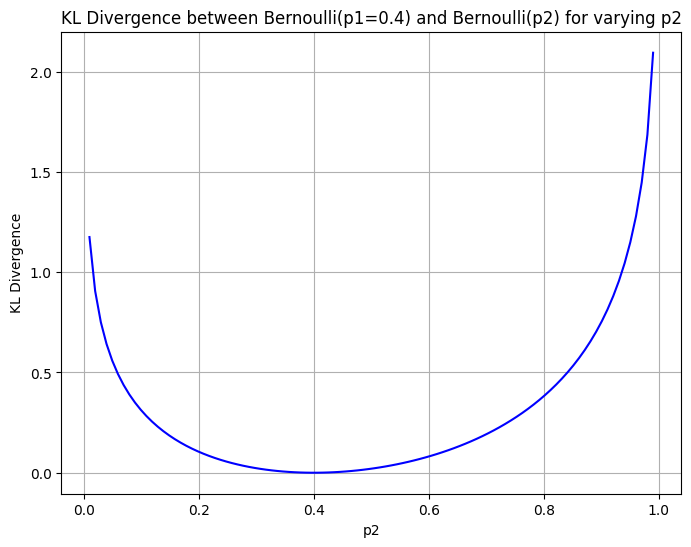

In [23]:
p2_values = np.linspace(0.01, 0.99, 100)  # Values of p2 to consider
kl_values = []  # List to store KL Divergence values

for p2 in p2_values:
    kl_value = kl_divergence(bernoulli(p1, 0), bernoulli(p2, 0))
    kl_values.append(kl_value)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(p2_values, kl_values, color='blue')
plt.xlabel('p2')
plt.ylabel('KL Divergence')
plt.title('KL Divergence between Bernoulli(p1=0.4) and Bernoulli(p2) for varying p2')
plt.grid(True)
plt.show()

# Task 3

## 3.a

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

# Load the MNIST Fashion dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Define the convolutional autoencoder architecture
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(4, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some test samples
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()